<html lang="en">
<head>
  
</head>
<body>
    <img src="IRIS.png" alt="Description of the image" width="600" height="400">
</body>
</html>

In [36]:

import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import numpy as np 


In [15]:
iris= pd.read_csv("IRIS.csv")

In [17]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [19]:
iris.shape


(150, 5)

In [27]:
iris.describe()


,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [30]:
iris.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

we have 4 feautre and 150 rows , all the numeric attributes are in the same units and same scales , no null value . 

let's explore the data with descriptive statistic and data visualization .

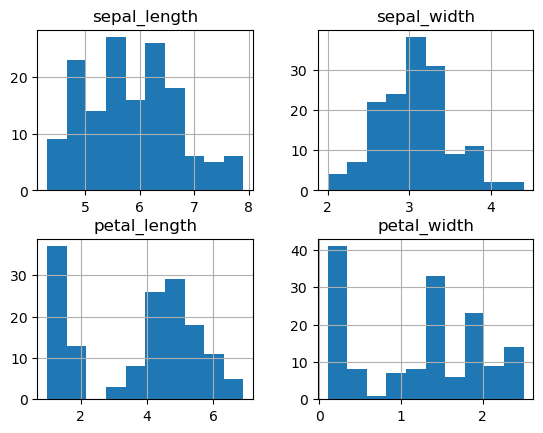

In [38]:
iris.hist()
plt.show() 


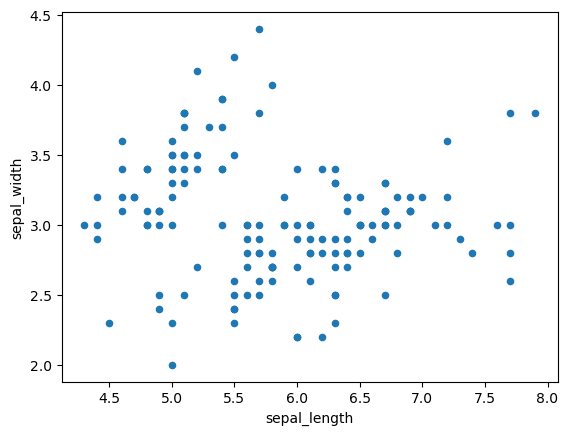

In [40]:
iris.plot(kind='scatter', x='sepal_length', y='sepal_width') ;
plt.show() 


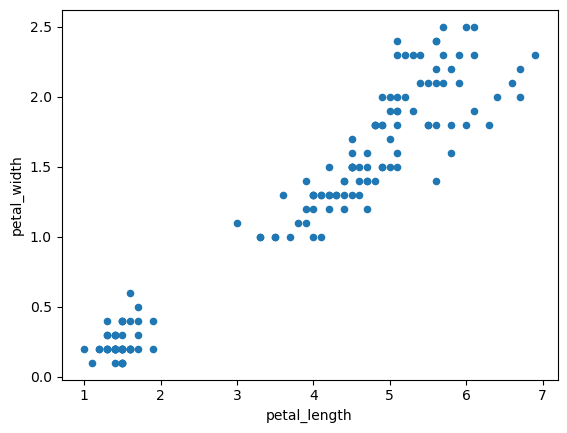

In [42]:
iris.plot(kind='scatter', x='petal_length', y='petal_width') ;
plt.show()

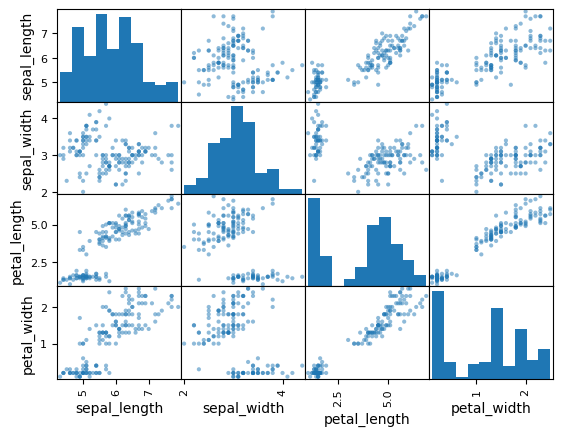

In [70]:
from pandas.plotting import scatter_matrix

scatter_matrix(iris)
plt.show()

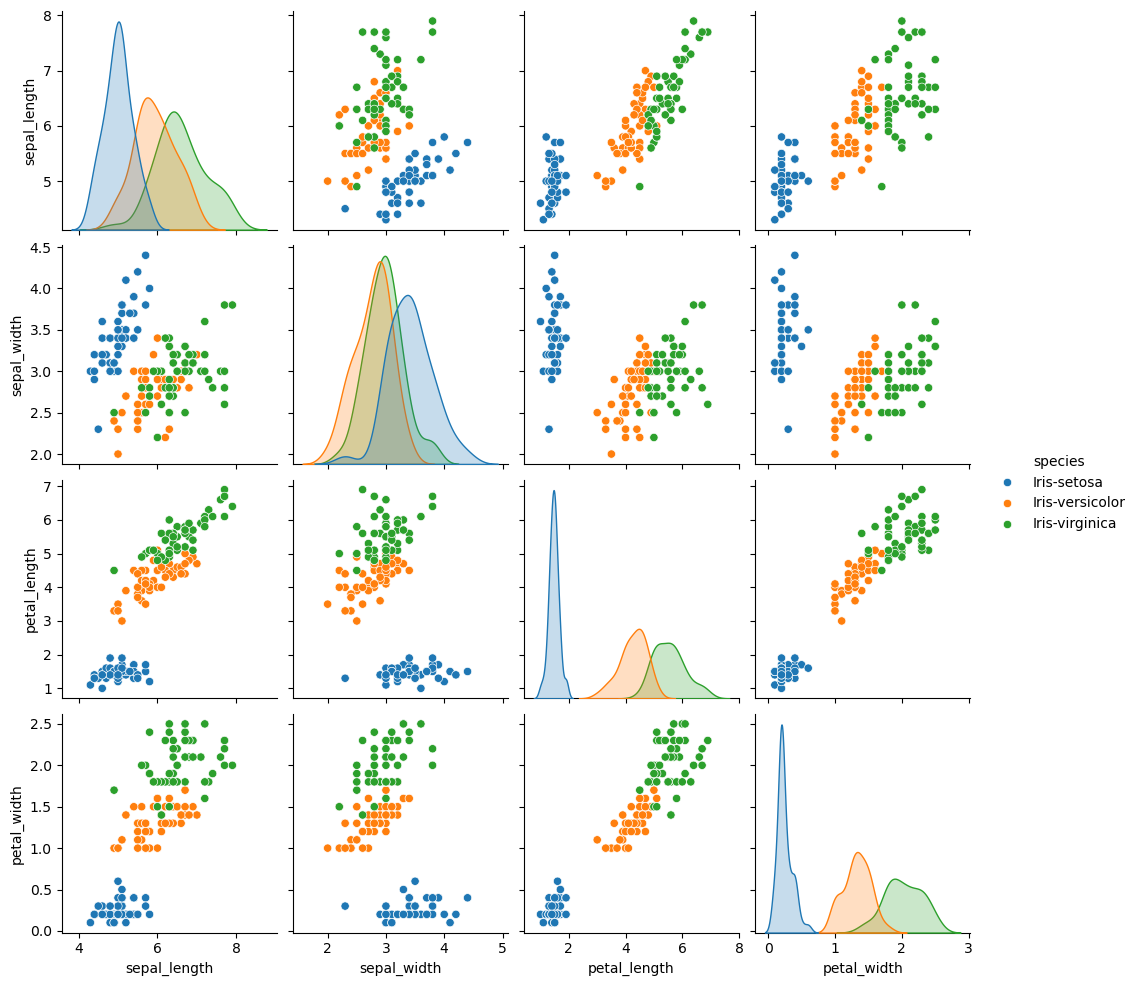

In [75]:
sns.pairplot(iris, hue="species")

plt.show()

Separating data into input and output variables

 

In [79]:
X = iris.drop("species", axis=1)
X

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [87]:
y= iris["species"] 
y

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: species, Length: 150, dtype: object

let's model and train our data 

In [92]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [93]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=30)


In [96]:
X_train

,sepal_length,sepal_width,petal_length,petal_width
59,5.2,2.7,3.9,1.4
94,5.6,2.7,4.2,1.3
73,6.1,2.8,4.7,1.2
89,5.5,2.5,4.0,1.3
88,5.6,3.0,4.1,1.3
...,...,...,...,...
53,5.5,2.3,4.0,1.3
130,7.4,2.8,6.1,1.9
140,6.7,3.1,5.6,2.4
45,4.8,3.0,1.4,0.3


In [98]:
y_train

59     Iris-versicolor
94     Iris-versicolor
73     Iris-versicolor
89     Iris-versicolor
88     Iris-versicolor
            ...       
53     Iris-versicolor
130     Iris-virginica
140     Iris-virginica
45         Iris-setosa
37         Iris-setosa
Name: species, Length: 105, dtype: object

In [100]:
kN = KNeighborsClassifier(n_neighbors = 4)
kN.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=4)

KNN is  the  most Popular algorithms for classfieir IRIS FLOWER 

In [103]:
y_pred = kN.predict(X_test)


In [105]:
print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 0.9555555555555556


In [108]:
print(classification_report(y_test, y_pred))


                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        13
Iris-versicolor       0.92      0.92      0.92        13
 Iris-virginica       0.95      0.95      0.95        19

       accuracy                           0.96        45
      macro avg       0.96      0.96      0.96        45
   weighted avg       0.96      0.96      0.96        45



In [110]:
LR=LogisticRegression(solver='liblinear', multi_class='ovr') 
LR.fit(X_train, y_train)

LogisticRegression(multi_class='ovr', solver='liblinear')

In [112]:
y_pred = LR.predict(X_test)




In [114]:
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.9333333333333333


In [116]:
print(classification_report(y_test, y_pred))



                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        13
Iris-versicolor       0.86      0.92      0.89        13
 Iris-virginica       0.94      0.89      0.92        19

       accuracy                           0.93        45
      macro avg       0.93      0.94      0.94        45
   weighted avg       0.94      0.93      0.93        45



In [124]:
DS=DecisionTreeClassifier( ) 
DS.fit(X_train, y_train)

DecisionTreeClassifier()

In [132]:
y_pred = DS.predict(X_test)


In [126]:

print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.9333333333333333


In [128]:
print(classification_report(y_test, y_pred))


                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        13
Iris-versicolor       0.86      0.92      0.89        13
 Iris-virginica       0.94      0.89      0.92        19

       accuracy                           0.93        45
      macro avg       0.93      0.94      0.94        45
   weighted avg       0.94      0.93      0.93        45



In [134]:
SVM= SVC(gamma='auto') 
SVM.fit(X_train, y_train)

SVC(gamma='auto')

In [136]:
y_pred = SVM.predict(X_test)


In [138]:
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 1.0


In [140]:
print(classification_report(y_test, y_pred))


                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        13
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00        19

       accuracy                           1.00        45
      macro avg       1.00      1.00      1.00        45
   weighted avg       1.00      1.00      1.00        45



In [219]:
models = {
    "kN": KNeighborsClassifier(n_neighbors=4),
    "DS": DecisionTreeClassifier(),
    "SVM": SVC(),
    "LR": LogisticRegression(solver='liblinear', multi_class='ovr') 
}

# Compare models using cross-validation
for name, model in models.items():
    cv_scores = cross_val_score(model, X, y, cv=10)
    print(f"{name} Accuracy: {cv_scores.mean():.3f}")

kN Accuracy: 0.967
DS Accuracy: 0.960
SVM Accuracy: 0.973
LR Accuracy: 0.953


<BarContainer object of 4 artists>

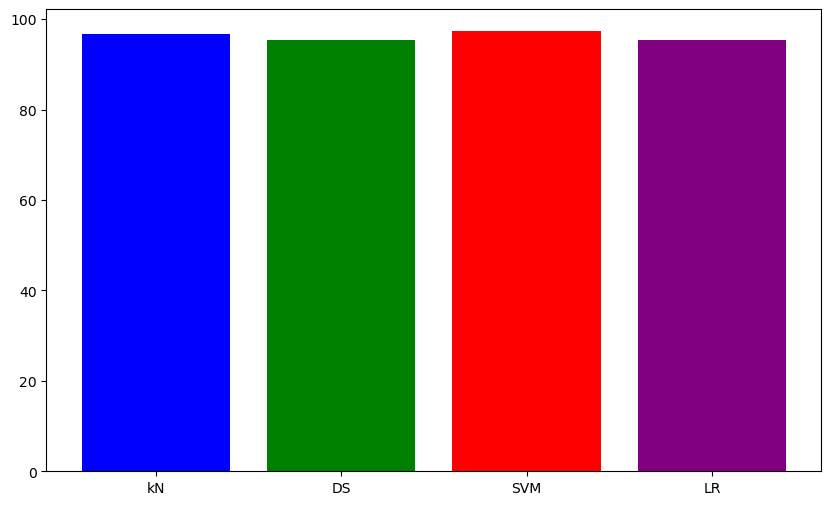

In [225]:
# List to store model names and their corresponding accuracies
model_names = []
accuracies = []

# Compare models using cross-validation 
for name, model in models.items():
    cv_scores = cross_val_score(model, X, y, cv=10)
    mean_accuracy = cv_scores.mean()
    model_names.append(name)
    accuracies.append(mean_accuracy * 100) 
 # Convert to percentage

# Plotting the accuracies
plt.figure(figsize=(10, 6))
plt.bar(model_names, accuracies, color=['blue', 'green', 'red', 'purple'])


SVM is the best model for classifier kind of IRIS FLOWER . 